# 19기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [2]:
df.info() #결측치 없음 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


# gender

In [3]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [4]:
#gender변수는 원핫인코딩을 해주어야 한다. 
df=pd.get_dummies(data=df,columns=['Gender'])

In [5]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,19,15,39,0,1
2,21,15,81,0,1
3,20,16,6,1,0
4,23,16,77,1,0
5,31,17,40,1,0
...,...,...,...,...,...
196,35,120,79,1,0
197,45,126,28,1,0
198,32,126,74,0,1


# Age

In [6]:
df['Age'].describe() #이상치는 없는듯 하다ㅣ .

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

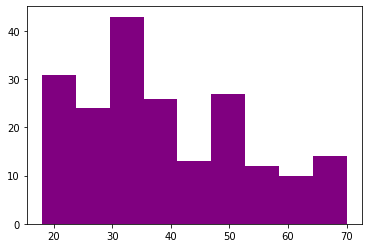

In [7]:
import matplotlib.pyplot as plt
plt.hist('Age',bins=9,range=(18,70),color='purple',data=df)
plt.show()

# Annual Income (k$) , Spending Score (1-100)

In [8]:
df['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

In [9]:
df['Annual Income (k$)'].describe() #최소값과 최대값이 굉장히 차이가 많이 나지만 이상치는 확인할 수 없었다. 

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

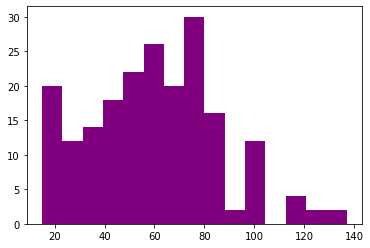

In [10]:
#분포를 확인하기 위해 히스토그램을 그려보자. 
plt.hist('Annual Income (k$)',bins=15,range=(15,137),color='purple',data=df)
plt.show()
#연 소득은 보통 15~20초반이나 중간에 몰려있음
#100을 넘는 것은 많지 않음 

In [11]:
df['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

In [12]:
df['Spending Score (1-100)'].describe() #1부터 90까지 존재 

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

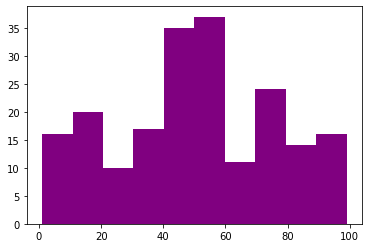

In [13]:
plt.hist('Spending Score (1-100)',bins=10,range=(1,99),color='purple',data=df)
plt.show()
#소비점수는 40-60에 몰려있음 

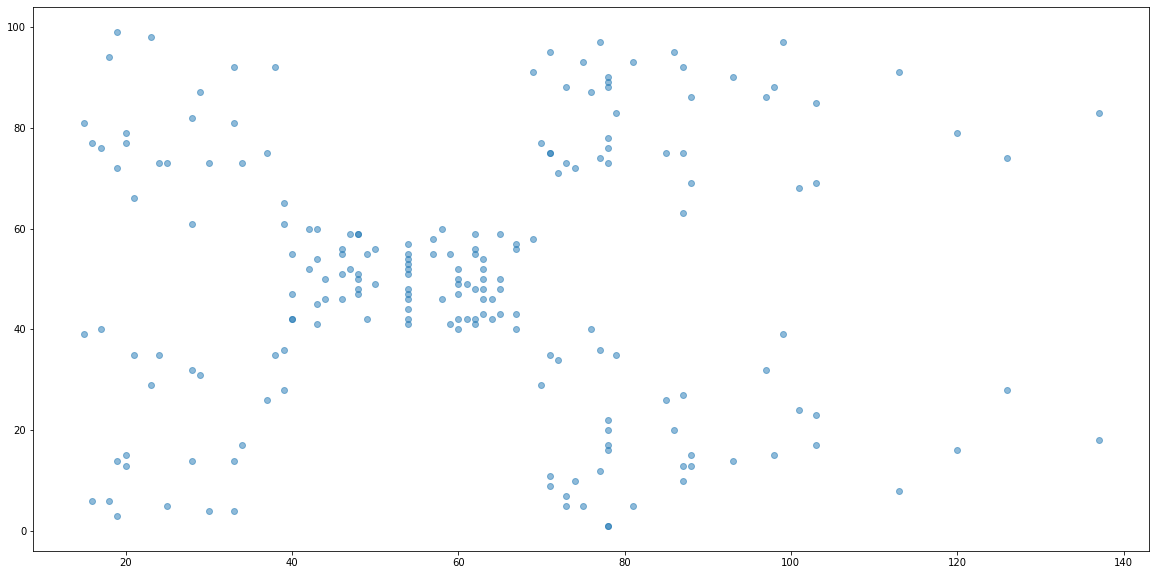

In [14]:
#연 소득과 소비점수로 산점도를 그려보자 
plt.subplots(figsize=(20,10))
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],alpha=0.5)
plt.show()
#미세하게 군집이 보이는것을 확인할 수 있다. 

# 변수형 범주 스케일링 

In [15]:
#일단 컬럼이름이 너무 짜증나니까 바꾸어주자
df=df.rename(columns={'Annual Income (k$)':'Annual_income'})
df=df.rename(columns={'Spending Score (1-100)':'Spending_score'})

In [16]:
#스탠다드 스케일링을 이용
from sklearn.preprocessing import  MinMaxScaler
columns=['Age','Annual_income','Spending_score']
mm=MinMaxScaler()
df[columns]=mm.fit_transform(df[columns])

In [17]:
df

,Age,Annual_income,Spending_score,Gender_Female,Gender_Male
CustomerID,,,,,
1,0.019231,0.000000,0.387755,0,1
2,0.057692,0.000000,0.816327,0,1
3,0.038462,0.008197,0.051020,1,0
4,0.096154,0.008197,0.775510,1,0
5,0.250000,0.016393,0.397959,1,0
...,...,...,...,...,...
196,0.326923,0.860656,0.795918,1,0
197,0.519231,0.909836,0.275510,1,0
198,0.269231,0.909836,0.744898,0,1


# 계층적 군집분석 최단연결법 

In [18]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
ward=linkage(df.loc[:,['Age','Annual_income','Spending_score']],metric='euclidean',method='ward') #와드연결법으로 계층군집분석


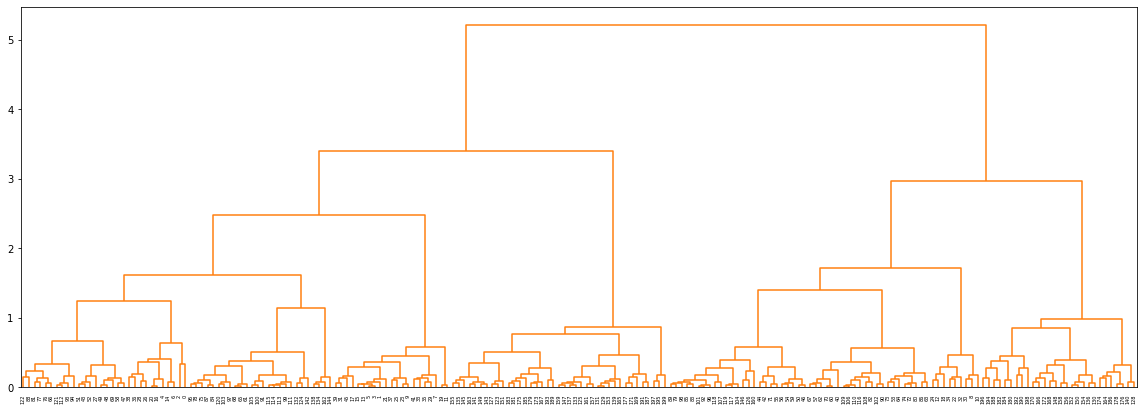

In [19]:
plt.figure(figsize=(20,7)) #dendrogram으로 시각화 
dendrogram(ward,orientation='top',labels=None,distance_sort='descending',color_threshold=250,show_leaf_counts=True)

plt.show()
#적절한 그룹의 수는 5개, y=2~3일때쯤 적절한듯 

In [20]:
#값마다 어떤 군집에 설정되었는지 확인 
assignments=fcluster(ward,2.5,'distance')
assignments

array([4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 3, 4, 3, 2, 3, 1, 3, 1, 3,
       4, 3, 4, 3, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
silhouette_score(df.loc[:,['Age','Annual_income','Spending_score']] ,assignments)

0.3652325990107206

# k-means

In [24]:
#엘보우 기법으로 적절한 k값을 찾아주자. 
from sklearn.cluster import KMeans
def elbow(X):
    sse=[]
    for i in range(1,11):
        km=KMeans(n_clusters=i,random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1,11),sse,marker='o')
    plt.xlabel('The Number of Cluster')
    plt.ylabel('SSE')
    plt.show()
    print(sse)


C:\Users\diaky\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


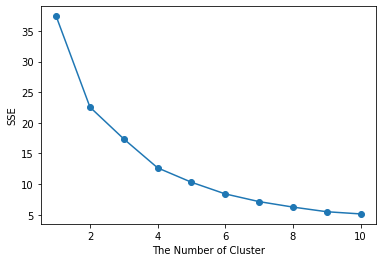

[37.401482160359436, 22.56077488260975, 17.370109472896694, 12.65028767622991, 10.303964892534122, 8.39802659802096, 7.14021543303523, 6.248886770318165, 5.4900153838727945, 5.132903729514553]


In [25]:
X=df.loc[:,['Age','Annual_income','Spending_score']]
elbow(X)
#k는 4개가 적당 

In [26]:
km=KMeans(n_clusters=4,random_state=1) #4로 설정하고 모델fit
km.fit(X)
new_labels=km.labels_
df['cluster2']=new_labels


In [27]:
new_labels.shape

(200,)

In [28]:

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(X, df['cluster2'])
df['km_silhou']=average_score
print(' 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))
#평균 실루엣 계수 

 데이터셋 Silhouette Analysis Score:0.392


In [29]:
df.groupby('cluster2')['km_silhou'].mean()

cluster2
0    0.392319
1    0.392319
2    0.392319
3    0.392319
Name: km_silhou, dtype: float64

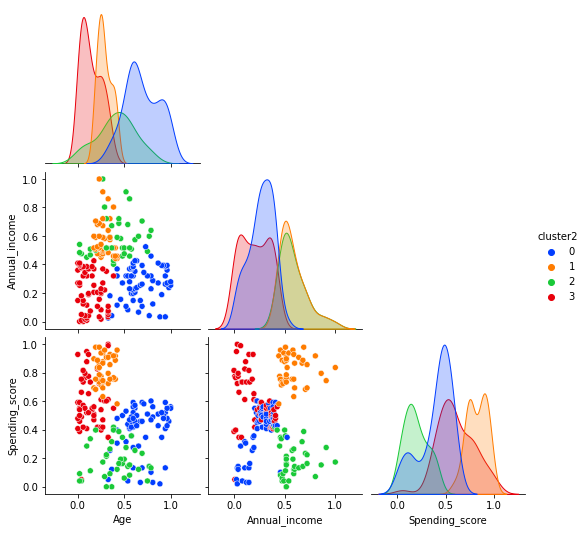

In [30]:
#kmeans시각화 
import seaborn as sns
sns.pairplot(df.loc[:,['Age','Annual_income','Spending_score','cluster2']],diag_kind='kde',hue='cluster2',corner=True,palette='bright')
plt.show()


# DBSCAN

In [31]:
X

,Age,Annual_income,Spending_score
CustomerID,,,
1,0.019231,0.000000,0.387755
2,0.057692,0.000000,0.816327
3,0.038462,0.008197,0.051020
4,0.096154,0.008197,0.775510
5,0.250000,0.016393,0.397959
...,...,...,...
196,0.326923,0.860656,0.795918
197,0.519231,0.909836,0.275510
198,0.269231,0.909836,0.744898


In [45]:
#최적의 eps찾기 
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
epsilone=np.arange(0.05,0.26,0.01).round(2) #최소 군집이 2개이상은 나와야해서 eps조절이 좀 까다로웠다...
output=[]
for eps in epsilone:
    label=DBSCAN(min_samples=4,eps=eps).fit_predict(X)
    score=silhouette_score(X,label)
    output.append((eps,score))
eps,score=sorted(output,key=lambda x :x[-1])[-1]
print('best_silhouette_score:',score)
print('eps:',eps)

best_silhouette_score: 0.250594690149877
eps: 0.12


In [33]:
model=DBSCAN(eps=0.12,min_samples=4)
model.fit(X)
df['cluster3']=model.fit_predict(X)

In [47]:
df['cluster3'].value_counts()

 3    54
-1    36
 5    35
 4    31
 0    18
 6     8
 1     6
 2     4
 7     4
 8     4
Name: cluster3, dtype: int64

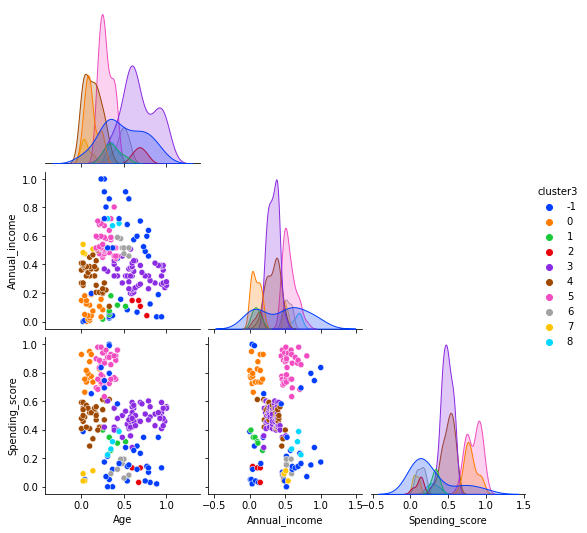

In [34]:
sns.pairplot(df.loc[:,['Age','Annual_income','Spending_score','cluster3']],diag_kind='kde',hue='cluster3',corner=True,palette='bright')
plt.show()
#파란색은 이상치 

In [35]:
# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(X, df['cluster3'])
df['db_silhou']=average_score
print(' 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))
#평균 실루엣 계수 

 데이터셋 Silhouette Analysis Score:0.251


In [36]:
df.groupby('cluster3')['db_silhou'].mean()

cluster3
-1    0.250595
 0    0.250595
 1    0.250595
 2    0.250595
 3    0.250595
 4    0.250595
 5    0.250595
 6    0.250595
 7    0.250595
 8    0.250595
Name: db_silhou, dtype: float64

In [ ]:
#군집계층분석 (와드)>0.3652325990107206 (군집4개)
#Kmeans >0.392  군집 4개 
#dbscan >0.250595 노이즈 포함 군집 9 개